## Latihan 2: Analisis Spasial dan Statistik


Latihan ini memberikan pandangan mengenai bagaimana data spasial pada Portal ArcGIS dapat dianalisis dan divisualisasikan dalam bentuk peta dan grafis.

### Inisiasi Pemanggilan Modul

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from arcgis.features import GeoAccessor, GeoSeriesAccessor


# Melakukan koneksi ke ArcGIS Online versi Learn
from arcgis.gis import GIS
gis = GIS("home")

### Memanggil data dari Portal

In [171]:
# Mencari layer dari Portal
#candi = gis.content.search("candi_feature", "Feature Layer", outside_org='true')[0]
candi = gis.content.get("77140b3593ac4381b6a05abb5b80f502")
# Menyimpan sebagai Feature Layer
flRetribusi = candi.layers[0]

In [172]:
# Menampilkan seluruh nama kolom
for f in flRetribusi.properties.fields:
    print(f['name'])

id
tipe
geom_wkt_type
geom_wkt_coordinates_0
geom_wkt_coordinates_1
geom
nama
jenis
desa
kecamatan
kabupaten
provinsi
x
y
deskripsi
latarsejarah
luasbangunan
luaslahan
ObjectId


### Konversi data menjadi Spatial Data Frame

In [173]:
sdf = pd.DataFrame.spatial.from_layer(flRetribusi)
sdf.head()

,id,tipe,geom_wkt_type,geom_wkt_coordinates_0,geom_wkt_coordinates_1,geom,nama,jenis,desa,kecamatan,kabupaten,provinsi,x,y,deskripsi,latarsejarah,luasbangunan,luaslahan,ObjectId,SHAPE
0,1255,POINT,Point,110.832300,-6.804000,0101000020E61000007E1D386744B55B409DEFA7C64B37...,Komplek Peninggalan Sunan Kudus,"Masjid, Makam, Menara",Kauman,Kudus Kota,Kudus,Jawa Tengah,-6.804047,110.832304,None,None,859.42,"21886,5 m2",1,"{""x"": 12337795.644725297, ""y"": -759209.5815613..."
1,1256,POINT,Point,110.637200,-6.894400,0101000020E6100000B84082E2C7A85B405A2BF697DD93...,Masjid Agung Demak,Masjid,Bintoro/Kauman,Demak,Demak,Jawa Tengah,-6.894444,110.637222,None,None,533.10,15000 m2,2,"{""x"": 12316079.215822363, ""y"": -769344.8623569..."
2,1257,POINT,Point,110.203771,-7.607712,0101000020E6100000E33785950A8D5B40098CF50D4C6E...,Taman Wisata Candi Borobudur,Candi,None,None,None,None,-7.607712,110.203771,None,None,NaN,10191000,3,"{""x"": 12267827.67121853, ""y"": -849386.14638993..."
3,1258,POINT,Point,110.492009,-7.751922,0101000020E61000009C1551137D9F5B4058923CD7F701...,Taman Wisata Candi Prambanan,Candi,None,None,None,None,-7.751922,110.492009,None,None,NaN,7400000,4,"{""x"": 12299914.1786058, ""y"": -865584.831306829..."
4,1259,POINT,Point,110.834488,-7.455752,0101000020E6100000E2395B4068B55B40AC58FCA6B0D2...,Daerah Sangiran,Cagar Budaya,None,None,Sragen dan Karanganyar,Jawa Tengah,-7.455752,110.834488,None,None,NaN,None,5,"{""x"": 12338038.76649319, ""y"": -832322.81619620..."


In [179]:
# Membuat peta untuk melihat sebaran awal data

peta_sebaran = gis.map("Indonesia")
peta_sebaran

MapView(layout=Layout(height='400px', width='100%'))

In [174]:
len(sdf)

735

In [180]:
# melakukan plotting menggunakan fungsi SDF
sdf.spatial.plot(map_widget= peta_sebaran)

True

### Visualisasi Peta dan Grafis

In [177]:
sdf.spatial.plot(map_widget=peta_sebaran, renderer_type='h')

True

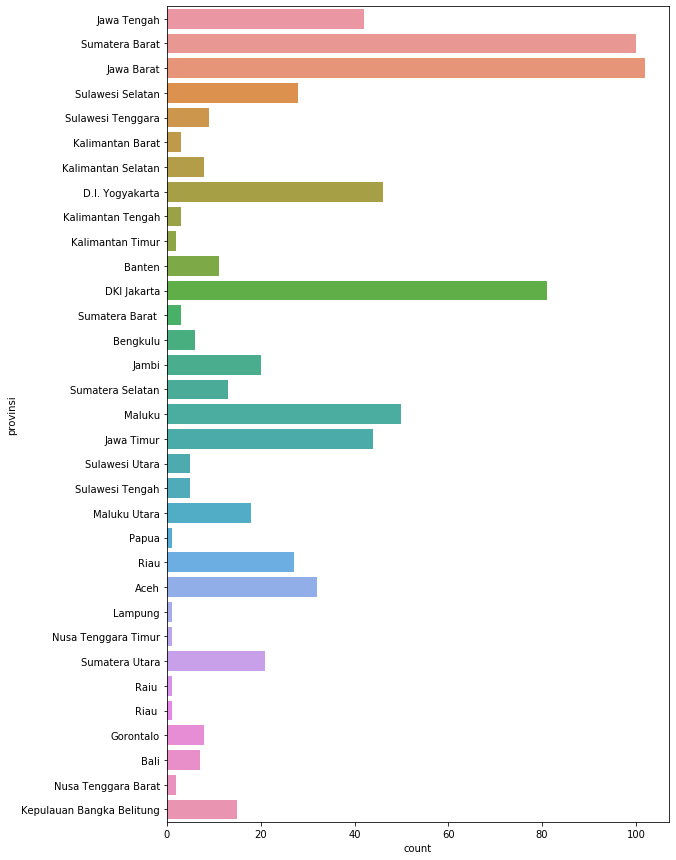

In [181]:
plt.figure(figsize=(9,15))
ax=sns.countplot(y='provinsi', data=sdf)

In [193]:
sdf.spatial.plot(map_widget = peta_sebaran, 
                     renderer_type='c', # for classs breaks renderer
                     method='esriClassifyNaturalBreaks',  # classification scheme
                     class_count=5, 
                     col='y',
                     cmap='Reds',  # matplotlib color map
                     #alpha=0.7,
                     outline_color=[0,0,0,0])

True

### Membangun Histogram dari Atribut Peta

In [203]:
# mencari dictionary dari layer pada simbologi peta
dict(peta_sebaran.layers[5].layer.layerDefinition.drawingInfo.renderer).keys()

dict_keys(['type', 'visualVariables', 'rotationType', 'minValue', 'field', 'defaultSymbol', 'defaultLabel', 'classificationMethod', 'classBreakInfos'])

In [202]:
# layer urutan ke enam
class_breaks = peta_sebaran.layers[5].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
print(len(class_breaks))

5


In [205]:
cbs_list = []
cmap_list = []
for cb in class_breaks:
    print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])

95.315144 - 106.62219125
106.62219125 - 117.9292385
117.9292385 - 129.23628574999998
129.23628574999998 - 140.543333
140.543333 - 140.543333


Text(0.5, 1.0, 'Histogram sebaran bangunan di garis bujur')

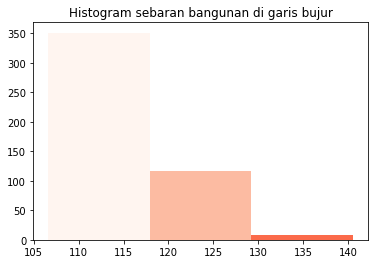

In [207]:
# build a histogram for the same class breaks
n, bins, patches = plt.hist(sdf['y'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram sebaran bangunan di garis bujur')